# Sorting algorithms

Here some of the algorithms been used in almost everywhere in databases, operating system, servers, client software like browsers, android, IOS, Windows Phone, ect ..., where data are manipulated as well its rapresentation from the very simple one like sequence of couples of *key-value* to structured data with nested structures, methods, functions, propterties.

## Selection sort
Suppose for example a vector of 10 elements :


In [1]:
# SOME IMPORTS FIRST
import random, matplotlib.pyplot as plt, numpy as np

def swap(s1 , s2):
    return s2, s1

In [2]:
vector = random.sample(range(1,10), 9)
print(vector)

[8, 1, 4, 2, 3, 6, 7, 5, 9]


Lets write a function in python that return a new vector with the same elements all sorted like *[1,2,3,4,5,...]* assuming  repeted elemets

In [3]:
def selection_sort(v):
    for i in range(0, len(vector) - 1):
        pmin = i
        for j in range(i+1, len(vector)):
            if v[j] < v[pmin]:
                pmin = j
        if pmin != v[i]:
            v[i], v[pmin] = swap(v[i], v[pmin])

It modifys the input vector in a sorted vector as follow :

In [4]:
selection_sort(vector)
print("New Vector : " + str(vector))

New Vector : [1, 2, 4, 3, 5, 6, 7, 8, 9]


This algorithm is very inefficient because for any $n$ elements vector we have allways an $O(n^2)$ complessity, that means it has  a quadratic exponential complessity for a vector of $n$ elements for $n \in \mathbb{N}$
Here it comes the computational cost: 
* first *for* loop scan $(n-1)$ elements
* second *for* loop nested to the previus one scan the $(n-1)$ elements
* The main instructions can be assumed to be for a total $\sum_{i=1}^{n} (n-1)^2$
* The relative function $f(x)=(n-1)^2$ behaves like $n^2$ for $n \rightarrow +\infty$
* It make sense writing the algorithm has a complessity of $O(n^2)$

## Bubble Sort
This algorithm is based on the idea of sorting the vector throwing a tuple (bubble) of elements where for each iteration elements with less value tend to throw at the begining of the the vector and elements with more value tend to throw to the end of the vector.
Here a new vector :

In [5]:
vector = random.sample(range(1,10), 9)
print("Vector : " + str(vector) )

Vector : [5, 7, 8, 9, 4, 3, 1, 2, 6]


In [6]:
def bubble_sort(v):
    while True:
        swaps = 0
        n = len(vector)
        for j in range(0, n -1):
            if v[j] > v[j+1]:
                v[j], v[j+1] = swap(v[j], v[j+1])
                swaps += 1
        if swaps == 0:
            break
        n -= 1
bubble_sort(vector)
print(vector)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Note that it is optimized at the last line because we asssume that after the first loop, the max value element throws at the end of the vector, recursively we can immagine that this happens for each loop where gradually the vector become more and more samller.
At this point we can redefine the function in order to make a counting of how many simple instructions the algorithm does for a single vector of elements, but first lets formalize 2 use cases in computational cost for a vector $V$:
- $O(n) : \forall v_i \in V : v_i < v_{i+1}, i \in [1,n]$
- $O(n^2) : \exists | \{v_1, v_n\} \in V : $ to be sorted on their complementary $\overline{i} \in [1,n]$ 

In [7]:
# Algorithm for counting number of iterations
def bubble_sort_counting(v):
    counting = 0
    while True:
        swaps = 0
        n = len(vector)
        for j in range(0, n -1):
            if v[j] > v[j+1]:
                v[j], v[j+1] = swap(v[j], v[j+1])
                swaps += 1
            counting += 1
        if swaps == 0:
            break
        n -= 1
    return counting

In [8]:
n_max = 100
n_list = list()
i_list = list()
for j in range(1, n_max + 1):
    n = random.randint(1,n_max+1)
    vector = random.sample(range(1,n+1), n)
    i = bubble_sort_counting(vector)
    n_list.append(n)
    i_list.append(i)

Here a graph that show how the bubble_sort complexity evolve for a range of vectors. In this example I have run on my machine a pseudo-randomizated a hundred vectors of random length and random values both as follow : random lenght settled  to a max one hundred elements and random values settled in the range $[1,100]$ in a random sequence. **Each point represent a single vector** where the *x- coordinates* represents the the vector length (number of elements), the *y-coordinates*  represents the number of iteration reached by bubble sort to get it sorted

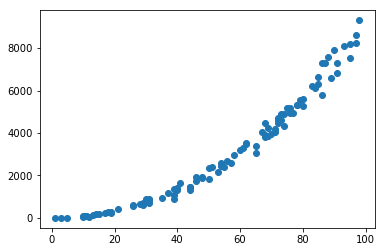

In [9]:
plt.scatter(n_list, i_list)
plt.show()

The set of points that represents the vectors show up something for sure: on average bubble sort works as an $O(n^2)$ sorting method because it seams following not a straight line as an $O(n)$ funciton does.

Here the following graph summarize the total set of points in a linear funciton, thanks to the interpolation method, where we use a polinome of second degree to show up a line the represent : 
> How much the computational cost rise compared to the number of elements to be sorted

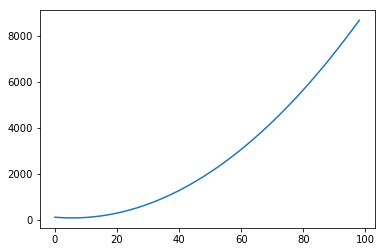

In [10]:
p = np.poly1d(np.polyfit(n_list, i_list, 2))
xp = np.linspace(0, max(n_list))
plt.plot(xp, p(xp))
plt.show()

Note how big the number of iteration becomes bigger aroung sorted vectors of 100 elements: more than 8000 iterations

## Quick sort
The idea is to pick an element $v_p \in V$ as a *pivot* and recursively apply the algorithm as follow :
$$ {P_1, P_2} \quad \textit{partitions of} \quad V \quad \| \quad \forall v_i \in P_1 : v_i < v_p, \forall v_j \in P_2 : v_p < v_j$$

In [11]:
# DEFINITION
def quick_sort(V, i, j):
    if i < j:
        p = partition(V, i, j)
        quick_sort(V, i, p - 1)
        quick_sort(V, p + 1, j)

def partition(V, i, j):
    p = V[j]
    small = i - 1
    for k in range(i, j):
        if V[k] <= p:
            small += 1
            V[k], V[small] = swap(V[k], V[small])
    
    V[j], V[small+1] = swap(V[j], V[small+1])
    return small + 1

Quick sort has an $O(n \  log(n))$ complexity, lets find out getting throw my machine data and plot the graph

In [12]:
# QUICK SORT WITH COUNTING
def quick_sort_counting(V, i, j):
    count = 0
    if i < j:
        p, count = partition(V, i, j)
        count += quick_sort_counting(V, i, p - 1)
        count += quick_sort_counting(V, p + 1, j)
    return count

def partition(V, i, j):
    count = 0
    p = V[j]
    small = i - 1
    for k in range(i, j):
        if V[k] <= p:
            small += 1
            V[k], V[small] = swap(V[k], V[small])
        count += 1
    
    V[j], V[small+1] = swap(V[j], V[small+1])
    return small + 1, count

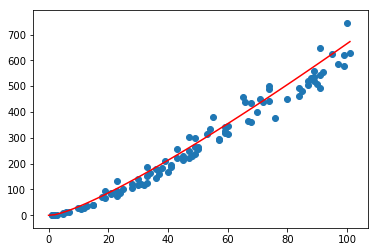

In [13]:
n_max = 100
n_list = list()
i_list = list()
for j in range(1, n_max + 1):
    n = random.randint(1,n_max+1)
    V = random.sample(range(1,n+1), n)
    i = quick_sort_counting(V, 0, len(V)-1 )
    n_list.append(n)
    i_list.append(i)
#p = np.poly1d(np.polyfit(n_list, i_list, 2))
xp = np.linspace(0.01, max(n_list))
#plt.plot(xp, p(xp), '-r')
plt.plot(xp, xp * np.log2(xp) , '-r')
plt.scatter(n_list, i_list)
plt.show()

As before the dots represents random-generated vectors sorted by quick sort algorithm where has coordinates : (*vector length*, *number of iterations done to be sorted*). The **red line** is the logarithmic function : $ p(n) = n \log_2 (n)$. As you can see $p(n)$ does fit pretty well all the dots, so we can say pretty sure that: 
> quick sort algorithm follows on average a $O(n \log(n) )$ complessity.

## Merge sort
It applys recursively a merging between 2 sorted vectors from the original one. Recursively it divide the vector in 2 parts until it cannot be divide any further when the vector has length 1. For each function call it digs into the very last smaller vector of one element where for definition it is already sorted, than on the first return callback merge 2 vectors of only one elements into a sorted vector of two elements and so on. 

In [14]:
def merge_sort(V):
    if len(V) == 1:
        return V
    result = []
    mid = int(len(V) / 2)
    y = merge_sort(V[:mid])
    z = merge_sort(V[mid:])
    i = 0
    j = 0
    while i < len(y) and j < len(z):
        if y[i] > z[j]:
            result.append(z[j])
            j += 1
        else:
            result.append(y[i])
            i += 1
    result += y[i:]
    result += z[j:]
    return result

Lets generate 100 vectors to be merge-sorted and counting iteration, what kind of complexity is going to show and witch function best fit all th evectors ?

In [15]:
# merge sort counting
def merge_sort_counting(V):
    count = 0
    if len(V) == 1:
        count += 1
        return V, count
    result = []
    mid = int(len(V) / 2)
    y, c1 = merge_sort_counting(V[:mid])
    z, c2 = merge_sort_counting(V[mid:])
    count += c1 + c2
    i = 0
    j = 0
    while i < len(y) and j < len(z):
        if y[i] > z[j]:
            result.append(z[j])
            j += 1
        else:
            result.append(y[i])
            i += 1
        count += 1
    result += y[i:]
    result += z[j:]
    count += (len(y) - i) + (len(z) - j)
    return result, count

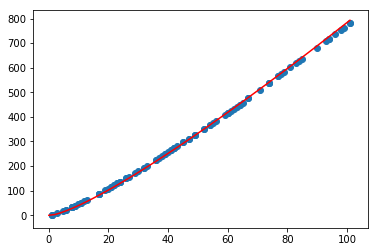

In [16]:
n_max = 100
n_list = list()
i_list = list()
for j in range(1, n_max + 1):
    n = random.randint(1,n_max+1)
    V = random.sample(range(1,n+1), n)
    V, i = merge_sort_counting(V)
    n_list.append(n)
    i_list.append(i)
#p = np.poly1d(np.polyfit(n_list, i_list, 2))
xp = np.linspace(0.1, max(n_list))
#plt.plot(xp, p(xp), '-r')
plt.plot(xp, xp * ( np.log(xp)/np.log(1.8) ), 'r-')
plt.scatter(n_list, i_list)
plt.show()

The first noty thing is *dots are really close together*, so the average complessity could be overlapped with the worst case. The red line I have fitted inside is the function :
$$ c(x) = x \log_{1.8}(x) $$
As the worst case and average case are so close to together it is not wrong to say that *merge-sort* is a very stable algorithm almost indipendent from the initial state of the vector.

There are some other sorting algorithms and other with variants using specific data structure. There some noty data structure very usefull for a very big number of tasks in any system or enviroment that involve data manipulation, that so means involving for definition computer science or more and more in general a f\...ing *Turing Machine* 